Copyright (c) 2017,2018, Johannes Schöneberg. All rights reserved.
The default copyright laws apply.

In [1]:
import csv


#http://soft-matter.github.io/trackpy/v0.3.2/tutorial/walkthrough.html


from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3

import matplotlib as mpl
import matplotlib.pyplot as plt

# change the following to %matplotlib notebook for interactive plotting
%matplotlib inline

# Optionally, tweak styles.
#mpl.rc('figure',  figsize=(10, 6))
#mpl.rc('image', cmap='gray')

import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience

import pims

import scipy


import math

from scipy import optimize

import scipy.ndimage

#own modules / functions
import sys
pythonPackagePath = "/Users/johannesschoeneberg/git/JohSchoeneberg/Confleezers/confleezers_data_analysis/"
sys.path.append(pythonPackagePath+"/modules")
import InputProcessing as inproc
import ForceFileProcessing as ffp
import TubeProcessing as tubeProc

In [2]:
# read input parameters:
path = '/Users/johannesschoeneberg/Desktop/PostDoc/hurley_lab/pulling_confleezers_dataSharing_local/2018-06-05_movie1/'

inputParameters = pd.read_csv(path+'_info.csv',names=['key','value'])
inputParameters

,key,value
0,input_data_folder,./
1,output_data_folder,./analysisOutput/
2,vesicleID_of_that_day,7
3,forceFile_raw_originalFilename,measurement__149.lvm
4,forceFile_raw_dataShareFilename,forceFile_raw.lvm
5,forceFile,forceFile.csv
6,forceFile_plot,forceFile.png
7,forceFile_alpha_y,-1519
8,forceFile_kappa_y,0.1992
9,forceFile_startTime,2018-06-05 13:38:11


In [4]:
# read the movie frames

frames_ch0 = pims.TiffStack_pil('/Users/johannesschoeneberg/Desktop/PostDoc/hurley_lab/pulling_confleezers_dataSharing_local/2018-06-05_movie1/movie_ch0_avg20_zoomVesicle.tif') 

inputDataFolder = inproc.getInputParameter(inputParameters,"input_data_folder")
movie_zoomVesicle_ch0 = inproc.getInputParameter(inputParameters,"movie_zoomVesicle_ch0")

#df_tubeFluorescence = pd.read_csv(path+outputDataFolder+movie_zoomVesicle_ch0+'__gaussFitAlongTube_medianFilter60.csv')
df_tubeFluorescence = pd.read_csv(path+outputDataFolder+'movie_ch0_avg20_zoomVesicle.tif__gaussFitAlongTube_medianFilter60.csv')

df_tubeFluorescence[0:5]


,Unnamed: 0,fluorescenceIntensityTube[AU],time[s]
0,0,140.873564,-67.000
1,1,140.873564,-66.667
2,2,140.873564,-66.334
3,3,140.873564,-66.001
4,4,140.873564,-65.668


In [5]:
def calculateTubeRadius(I_tube,I_vesicle):
    prefactorForTubeRadius = 161 #nm
    interceptForTubeRadius = 4.4
#    prefactorForTubeRadius = 156.9 #161 #nm
#    interceptForTubeRadius = 10.6 #4.4
    print(I_tube/I_vesicle)
    return interceptForTubeRadius + prefactorForTubeRadius * I_tube/I_vesicle

# calculate the radius from the tube intensity 

[ 0.08773525  0.08773525  0.08773525 ...,  0.00250822         nan
         nan]
[ 0.08773525  0.08773525  0.08773525 ...,  0.00250822         nan
         nan]


/Users/johannesschoeneberg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in greater
/Users/johannesschoeneberg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in less


Text(0.5,0,'time [frames]')

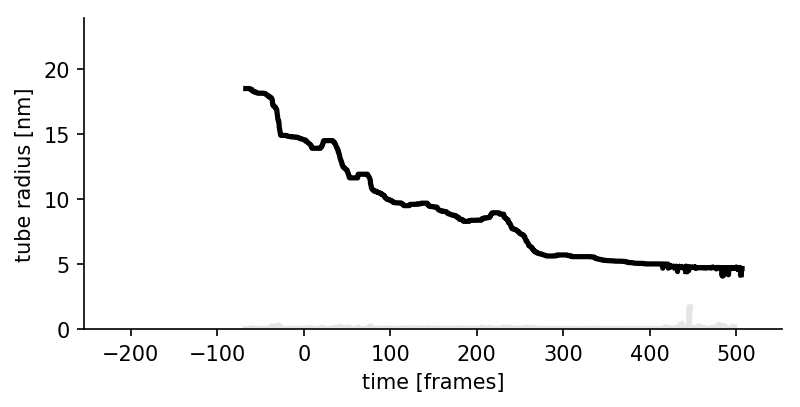

In [26]:
I_tube_exp = df_tubeFluorescence['fluorescenceIntensityTube[AU]'].values;


I_vesicle_exp = np.average([1314, 1503, 2000]);
#print("I_tube_exp",I_tube_exp,"I_vesicle_exp",I_vesicle_exp)



######



deltaT = int(inproc.getInputParameter(inputParameters,"movie_startTime_difference_UVstart_seconds"))
frameRate = float(inproc.getInputParameter(inputParameters,"time_between_frames_seconds"))
time = deltaT + np.arange(0,len(I_tube_exp))*frameRate


plt.figure(dpi=150)
plt.gca().set_aspect(15)
#
tubeRadius_raw = np.round(calculateTubeRadius(I_tube_exp,I_vesicle_exp),decimals=2);

#generic standard deviation filter on a window
from scipy.ndimage.filters import generic_filter
movingStandardDeviation_tubeRadius = generic_filter(tubeRadius_raw, np.std, size=5)
plt.plot(time,movingStandardDeviation_tubeRadius,lw=3,c='grey',alpha=0.2);
plt.ylim(0,24)



#####



tubeRadius_raw = np.round(calculateTubeRadius(I_tube_exp,I_vesicle_exp),decimals=2);
tubeRadius = tubeRadius_raw
tubeRadius[tubeRadius > 20] = np.nan
tubeRadius[tubeRadius < 4] = np.nan
#print("tubeRadius: {}nm".format(tubeRadius))

plt.plot(time,scipy.ndimage.median_filter(tubeRadius,40),lw=2.5,c='k');
plt.ylim(0,24)

plt.xlim(-253.5,552.5)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.ylabel('tube radius [nm]')
plt.xlabel('time [frames]')



In [27]:
df = pd.DataFrame({'time': time, 'radius[nm]': scipy.ndimage.median_filter(tubeRadius,40)})
df.to_csv("./output3/tube_radius_over_time_new2.csv")
df[0:10]

,radius[nm],time
0,18.53,-67.000
1,18.53,-66.667
2,18.53,-66.334
3,18.53,-66.001
4,18.53,-65.668
5,18.53,-65.335
6,18.53,-65.002
7,18.53,-64.669
8,18.53,-64.336
9,18.53,-64.003
